In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



In [10]:
df = pd.read_csv('kdrama.csv')
df.head()

,accidental_touches,bickering_scenes,romantic_ost_scenes,jealous_reactions,shared_meals,rain_scenes,love_triangle,tragic_backstory,friendship_start,chemistry_score,get_together_ep8
0,3,8,1,5,4,1,1,1,1,8.6,0
1,5,11,9,2,3,0,0,0,0,6.9,1
2,3,5,2,5,9,1,1,1,Y,6.2,1
3,4,4,8,0,5,1,0,0,1,7.2,1
4,-3,6,3,3,7,1,1,0,0,7.5,1


### DATASET KEY

- accidental_touches (int): Number of accidental physical touches. (1-10)
- bickering_scenes (int): Number of petty arguments. (0-15)
- romantic_ost_scenes (int): Scenes with romantic background music. (0-15)
- jealous_reactions (int): Jealous moments by either lead. 
- shared_meals (int): Meals the couple shares.
- rain_scenes (int): Romantic scenes in the rain.
- love_triangle (binary): 1 = yes, 0 = no (may include Y/N or Yes/No).
- tragic_backstory (binary): 1 = yes, 0 = no (may include messy labels).
- friendship_start (binary): Started as friends (1/0, Y/N, Yes/No).
- chemistry_score (float): Scale of 1–10 rating screen chemistry.
- get_together_ep8 (target): 1 = yes, 0 = no.


In [ ]:
# Check for missing values
df.info()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidental_touches   199 non-null    int64  
 1   bickering_scenes     199 non-null    int64  
 2   romantic_ost_scenes  199 non-null    int64  
 3   jealous_reactions    199 non-null    int64  
 4   shared_meals         199 non-null    int64  
 5   rain_scenes          199 non-null    int64  
 6   love_triangle        199 non-null    int64  
 7   tragic_backstory     199 non-null    int64  
 8   friendship_start     199 non-null    object 
 9   chemistry_score      199 non-null    float64
 10  get_together_ep8     199 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 17.2+ KB
accidental_touches     0
bickering_scenes       0
romantic_ost_scenes    0
jealous_reactions      0
shared_meals           0
rain_scenes            0
love_triangle          0
tragic_

In [15]:
#Saw that there were Y/N values in love_triangle column, converting to 1/0
df = df.replace("N","0")
df = df.replace("Y","1")

In [16]:
df.describe()

,accidental_touches,bickering_scenes,romantic_ost_scenes,jealous_reactions,shared_meals,rain_scenes,love_triangle,tragic_backstory,chemistry_score,get_together_ep8
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,3.070352,8.231156,4.844221,2.472362,3.819095,0.256281,0.165829,0.095477,6.936683,0.537688
std,1.548892,2.317442,1.800913,1.053129,1.013762,0.502165,0.372865,0.294614,0.603451,0.499835
min,-3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.500000,0.000000
25%,2.000000,7.000000,4.000000,2.000000,3.000000,0.000000,0.000000,0.000000,6.600000,0.000000
50%,3.000000,8.000000,5.000000,2.000000,4.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,4.000000,9.000000,6.000000,3.000000,4.000000,0.000000,0.000000,0.000000,7.300000,1.000000
max,7.000000,16.000000,10.000000,6.000000,9.000000,2.000000,1.000000,1.000000,8.600000,1.000000


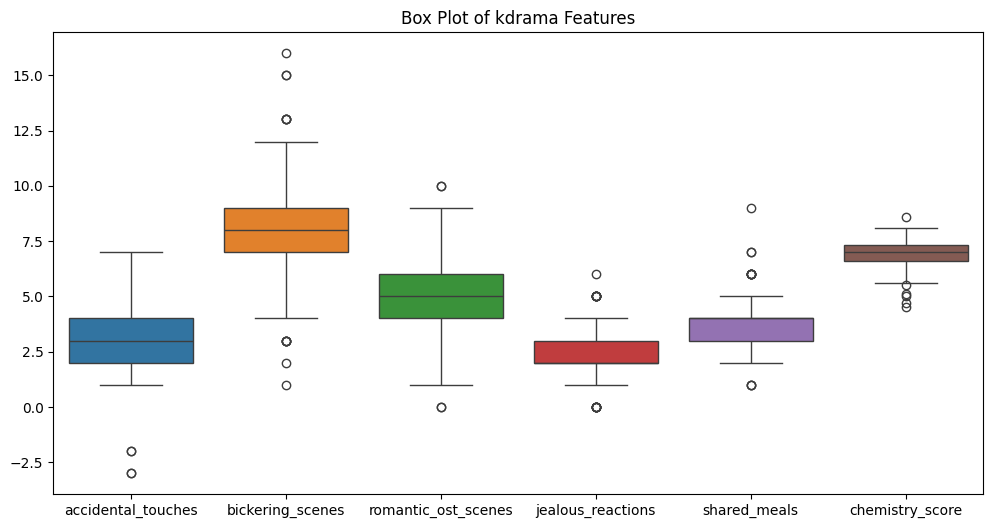

In [ ]:
# Visualizing distributions of key features
columns_to_plot = ['accidental_touches', 'bickering_scenes', 'romantic_ost_scenes', 'jealous_reactions', 'shared_meals','chemistry_score']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot])
plt.title(f'Box Plot of kdrama Features')
plt.show()


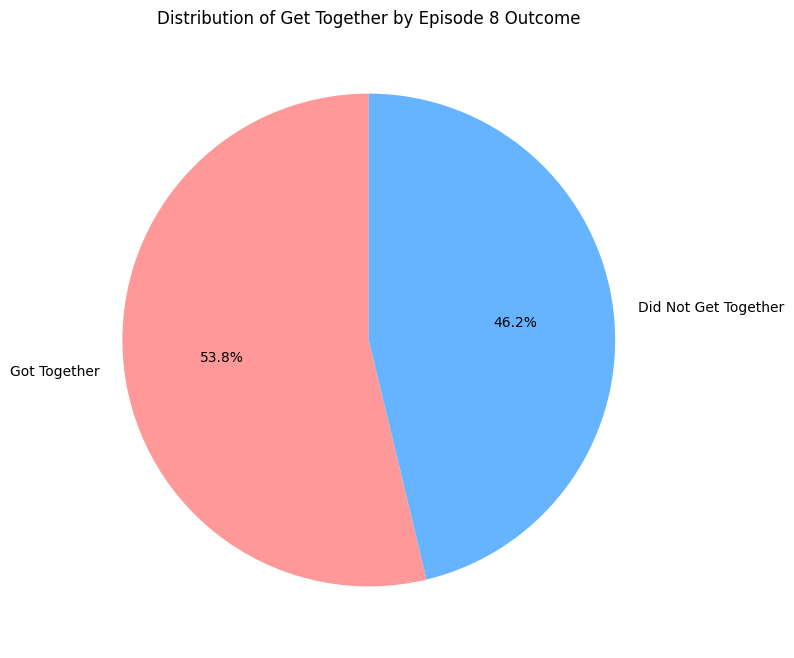

In [36]:
#pie chart for target distribution

target_counts = df['get_together_ep8'].value_counts()

#pie chart labels
labels = ['Got Together', 'Did Not Get Together']
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])  
plt.title('Distribution of Get Together by Episode 8 Outcome')
plt.show()

In [35]:
print("Total dramas:", df["get_together_ep8"].count())
print("Got together by Ep. 8:", df["get_together_ep8"].sum())
print("Did NOT get together:", (df["get_together_ep8"] == 0).sum())
print("Percentage together:", df["get_together_ep8"].mean() * 100)


Total dramas: 199
Got together by Ep. 8: 107
Did NOT get together: 92
Percentage together: 53.768844221105525


In [ ]:
#check for negative values
cols = ["accidental_touches", "bickering_scenes", "romantic_ost_scenes",
        "jealous_reactions", "shared_meals", "chemistry_score"]

df[df[cols].lt(0).any(axis=1)]



,accidental_touches,bickering_scenes,romantic_ost_scenes,jealous_reactions,shared_meals,rain_scenes,love_triangle,tragic_backstory,friendship_start,chemistry_score,get_together_ep8
4,-3,6,3,3,7,1,1,0,0,7.5,1
30,-2,7,8,3,6,1,1,0,0,7.7,1
64,-2,5,7,0,5,1,1,1,0,7.9,1
80,-3,9,8,0,4,2,1,0,1,7.9,0


In [ ]:
#turn the negative values to positive
df[cols] = df[cols].abs()

In [ ]:
#check again for negative values
df[df[cols].lt(0).any(axis=1)]

,accidental_touches,bickering_scenes,romantic_ost_scenes,jealous_reactions,shared_meals,rain_scenes,love_triangle,tragic_backstory,friendship_start,chemistry_score,get_together_ep8


In [ ]:
#found some duplicate rows, removing them
df.duplicated().sum()

np.int64(42)

In [44]:
df.drop_duplicates(inplace=True)

In [ ]:
#check data types and make sure numeric columns are correct
df.dtypes


accidental_touches       int64
bickering_scenes         int64
romantic_ost_scenes      int64
jealous_reactions        int64
shared_meals             int64
rain_scenes              int64
love_triangle            int64
tragic_backstory         int64
friendship_start        object
chemistry_score        float64
get_together_ep8         int64
dtype: object

In [46]:
df = df.apply(pd.to_numeric, errors="ignore")
df.dtypes

C:\Users\jnasa\AppData\Local\Temp\ipykernel_20208\4053057914.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


accidental_touches       int64
bickering_scenes         int64
romantic_ost_scenes      int64
jealous_reactions        int64
shared_meals             int64
rain_scenes              int64
love_triangle            int64
tragic_backstory         int64
friendship_start         int64
chemistry_score        float64
get_together_ep8         int64
dtype: object

In [ ]:
def test_models(df, target_col):
    # 1. Split data
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # 2. Scaling for models that need it
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 3. Define models
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier()
    }
    
    results = []

    
    for name, model in models.items():
        
        # scaled data for Logistic Regression 
        if name == "Logistic Regression":
            model.fit(X_train_scaled, y_train)
            preds = model.predict(X_test_scaled)
            probs = model.predict_proba(X_test_scaled)[:, 1]
        else:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            probs = model.predict_proba(X_test)[:, 1]
        
        # Metrics
        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, preds),
            "Precision": precision_score(y_test, preds),
            "Recall": recall_score(y_test, preds),
            "F1": f1_score(y_test, preds),
            "AUC": roc_auc_score(y_test, probs)
        })
    
    return pd.DataFrame(results)


In [57]:
results = test_models(df, "get_together_ep8")
results.sort_values("Accuracy", ascending=False)


,Model,Accuracy,Precision,Recall,F1,AUC
3,Gradient Boosting,0.9375,0.904762,1.000000,0.950000,0.979757
0,Logistic Regression,0.8750,0.857143,0.947368,0.900000,0.979757
1,Decision Tree,0.8750,0.826087,1.000000,0.904762,0.846154
2,Random Forest,0.8750,0.857143,0.947368,0.900000,0.933198


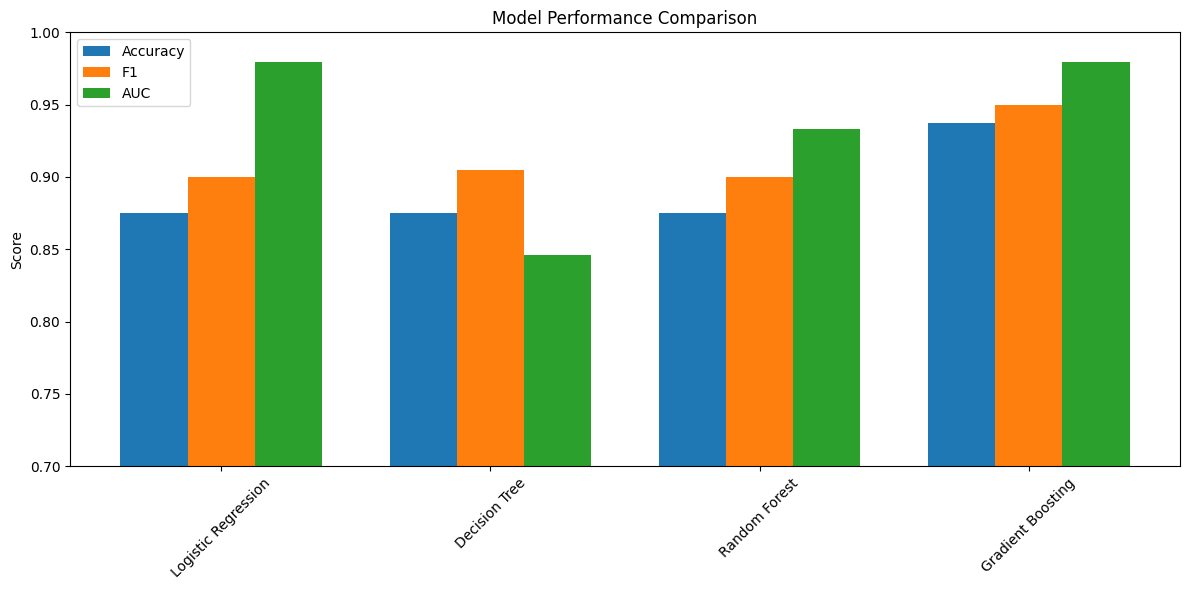

In [60]:
metrics = ["Accuracy", "F1", "AUC"]

data = results[metrics].values

#number of models and  metrics
n_models = len(results)
n_metrics = len(metrics)    

x = np.arange(n_models)
width = 0.25

plt.figure(figsize=(12, 6)) 

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results[metric], width=width, label=metric)

# Add titles and labels
plt.xticks(x + width, results["Model"], rotation=45)
plt.ylim(0.7, 1.0)   # lower and upper limits
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

# Features + target
X = df.drop("get_together_ep8", axis=1)
y = df["get_together_ep8"]

# split again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Best model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions on test set
y_pred = gb_model.predict(X_test)


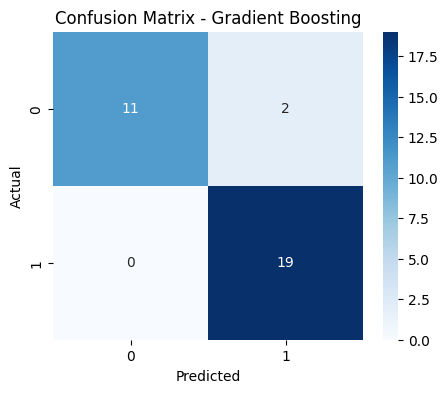

In [63]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


In [ ]:
# Feature Importance

importances = pd.Series(
    gb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(importances)


chemistry_score        0.453112
accidental_touches     0.192138
bickering_scenes       0.164214
shared_meals           0.079797
love_triangle          0.028211
friendship_start       0.027406
romantic_ost_scenes    0.021904
rain_scenes            0.020030
jealous_reactions      0.011346
tragic_backstory       0.001843
dtype: float64


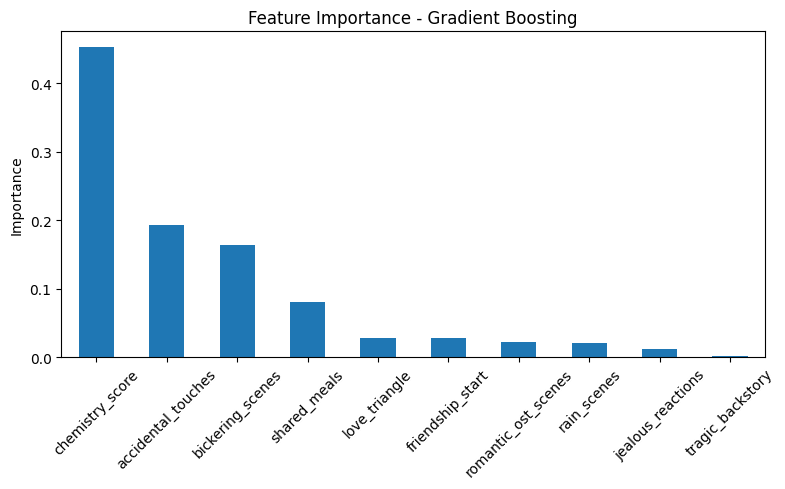

In [ ]:
plt.figure(figsize=(8,5))
importances.plot(kind="bar")
plt.ylabel("Importance")
plt.title("Feature Importance - Gradient Boosting")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#feature importance bar plot with seaborn
